In [1]:
#########################################################################################################################
# Kurs: Data science, studia zaoczne, Informatyka w Biznesie
# Data ostatniej poprawki: 04.12.2018
# Autorzy: Mariusz Czarny, Juliusz Sadowski, Anita

# Celem projektu jest zastosowanie języka Python przy użyciu bibliotek pandas, nympy, itp., aby wykonać analizę danych.
# Danymi źródłowymi są pliki tekstowe: campaigns.txt, customers.txt, orderlines.txt, orders.txt, products.txt pobrane z
# serwera: https://drive.google.com/drive/folders/0B1A_5ELLOtW4VXgwOG1oZmhpS0k
# Ścieżka źródłowa dla plików: powinny znajdować się w tym samym katalogu co plik projektowy
# Wersja pythona: 3.6.3
# Plik dostępny jest także pod linkiem: 

# User story: 
#########################################################################################################################

In [2]:
# import wewenętrznej bazy danych
import sqlite3

In [3]:
# import standardowych bibliotek
import pandas as pd
import numpy as np
import os

In [4]:
# import bibliotek służących do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
# sprawdza aktualną ścieżkę
%pwd

'C:\\Users\\Mariusz\\studia\\3 semestr\\Data science\\my project'

In [6]:
# połączenie z bazą i wykorzystanie kursora
dbConnection = sqlite3.connect("bookdb");
dbCursor = dbConnection.cursor()

In [36]:
# rozszerzenie plików zawierających dane do wczytania
txtExtention = ".txt"

In [37]:
# tablica z nazwami plików do oczytu, zawierające dane, które będą importowane do tabel bazodanowych
tables = ["Customers", "Orderlines", "Products", "Campaigns", "Orders", "ZipCounty"]

In [38]:
# wczytywanie kolejnych plików w pętli for
for table in tables:
    # ustawienie scieżki (nazwy plików pisane małymy literami)
    path = os.path.expanduser(table.lower() + txtExtention)
    # wczytywanie pliku używając delimitera tabulacji oraz kodowania 'latin1'
    file = pd.read_csv(path, delimiter="\t", encoding = 'latin1')
    # tworzy na podstawie pliku tabele i wypełnia ją rekordami, jesli istnieje zostaje nadpisana
    file.to_sql(table, dbConnection, if_exists="replace");

In [10]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [42]:
selectCities = '''SELECT latitude, longitude, poname from ZipCounty '''
citiesDF = pd.read_sql_query(selectCities, dbConnection)

In [46]:
onlyThreecities=citiesDF.loc[citiesDF["poname"].isin(["SAN JUAN", "ST THOMAS", "CHRISTIANSTED"])]
onlyThreecities.head()

,latitude,longitude,poname
14,18.322285,-64.963715,ST THOMAS
15,18.322285,-64.963715,ST THOMAS
16,18.322285,-64.963715,ST THOMAS
17,18.322285,-64.963715,ST THOMAS
18,18.322285,-64.963715,ST THOMAS


In [47]:
%matplotlib inline
import seaborn as sns; sns.set()

C:\Users\Mariusz\Development\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Mariusz\Development\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mariusz\Development\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Mariusz\Development\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, d

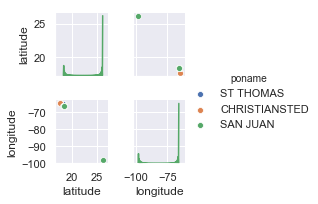

In [49]:
sns.pairplot(onlyThreecities, hue='poname', height=1.5);